## Importation de la base de données

In [15]:
import pandas as pd 
data = pd.read_csv("Tweets.csv", usecols=['text', 'airline_sentiment'])
data 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


## Minuscule et suppression des ponctuations

In [16]:
import re 
# Fonction pour mettre le texte en minuscules et supprimer les caractères spéciaux
def nettoyer_texte(texte):
    texte = texte.lower()  # Convertir en minuscules
    texte = re.sub(r'[^a-zA-Z0-9\s]', '', texte)  # Supprimer les caractères spéciaux et la ponctuation
    return texte

# Appliquer la fonction de nettoyage à la colonne 'text'
data['text'] = data['text'].apply(nettoyer_texte)
data 

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus youve added commercials to ...
2,neutral,virginamerica i didnt today must mean i need t...
3,negative,virginamerica its really aggressive to blast o...
4,negative,virginamerica and its a really big bad thing a...
...,...,...
14635,positive,americanair thank you we got on a different fl...
14636,negative,americanair leaving over 20 minutes late fligh...
14637,neutral,americanair please bring american airlines to ...
14638,negative,americanair you have my money you change my fl...


## Tokenisation et supprimer les mots vides

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Télécharger les stopwords et le tokenizer de nltk (à faire une seule fois)
#nltk.download('punkt')
#nltk.download('stopwords')

# Fonction pour nettoyer le texte, faire la tokenisation et supprimer les mots vides
def tokeniser(texte):
    tokens = word_tokenize(texte)  # Tokenisation
    stop_words = set(stopwords.words('english'))  # Définir la liste des stopwords en français
    tokens = [mot for mot in tokens if mot not in stop_words]  # Supprimer les mots vides
    return tokens

# Appliquer la fonction de nettoyage et tokenisation à la colonne 'text'
data['text'] = data['text'].apply(tokeniser)
data 

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, youve, added, commercial..."
2,neutral,"[virginamerica, didnt, today, must, mean, need..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"
...,...,...
14635,positive,"[americanair, thank, got, different, flight, c..."
14636,negative,"[americanair, leaving, 20, minutes, late, flig..."
14637,neutral,"[americanair, please, bring, american, airline..."
14638,negative,"[americanair, money, change, flight, dont, ans..."


## Réduire les différence grammaticales

In [18]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('omw-1.4')  # Support supplémentaire pour WordNet

In [19]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatiser(texte):
    tokens_lemmatized = [lemmatizer.lemmatize(mot) for mot in texte]  # Appliquer la lemmatisation
    return ' '.join(tokens_lemmatized)

# Appliquer la fonction à la colonne 'text'
data['text'] = data['text'].apply(lemmatiser)
data 

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus youve added commercial expe...
2,neutral,virginamerica didnt today must mean need take ...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
...,...,...
14635,positive,americanair thank got different flight chicago
14636,negative,americanair leaving 20 minute late flight warn...
14637,neutral,americanair please bring american airline blac...
14638,negative,americanair money change flight dont answer ph...


## Bag of words et variable cible 

In [20]:
from sklearn.preprocessing import LabelEncoder
# Convertir les sentiments en étiquettes numériques
label_encoder = LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical

# Création du modèle Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text']).toarray()
y = to_categorical(data['airline_sentiment'])  # Convertir les étiquettes en vecteurs binaires

## Réseau de neurones

In [29]:
from sklearn.model_selection import train_test_split
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Epoch 1/3
4099/4099 [==============================] - 15s 4ms/step - loss: 0.6411 - accuracy: 0.7347 - val_loss: 0.5660 - val_accuracy: 0.7785
Epoch 2/3
4099/4099 [==============================] - 16s 4ms/step - loss: 0.4338 - accuracy: 0.8347 - val_loss: 0.5661 - val_accuracy: 0.7873
Epoch 3/3
138/138 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7974
Loss: 0.6006750464439392
Accuracy: 0.7973588109016418


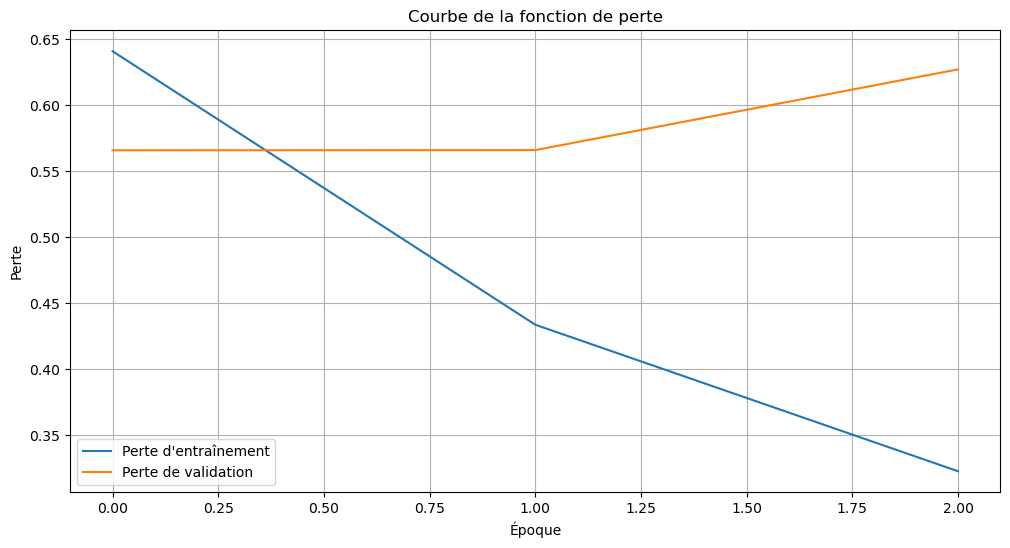

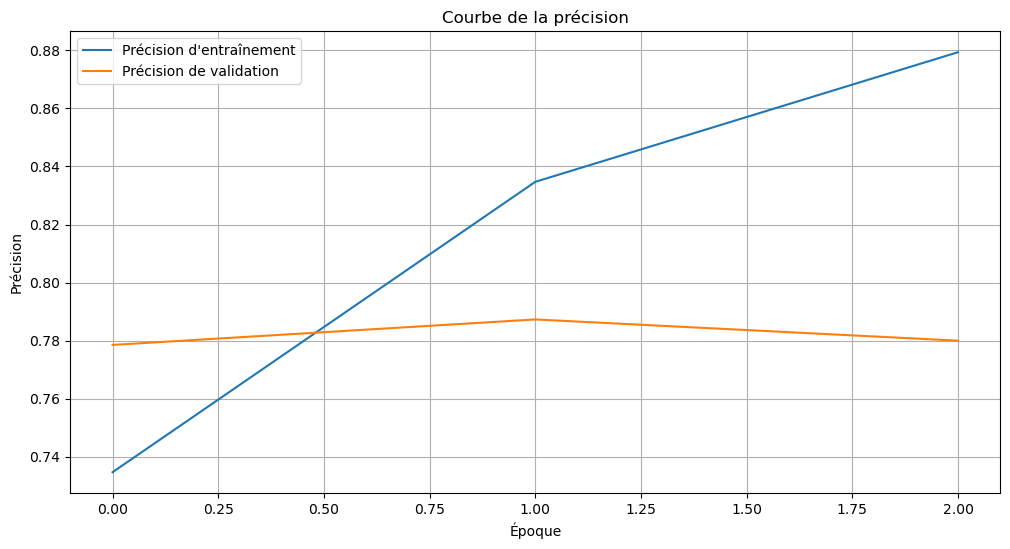

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

# Construction du modèle de réseau de neurones
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) #64 c'est le nombre de neurones dans cette couche dense. Chaque neurone de la couche dense recevra un vecteur d'entrée de taille X_train.shape[1]
model.add(Dropout(0.5))  # 50% des neurones sont ignorés pendant l'entraînement
model.add(Dense(32, activation='relu')) #Elle permet de capturer des relations non linéaires dans les données et aide à introduire de la non-linéarité dans le modèle, ce qui est crucial pour résoudre des problèmes complexes.
model.add(Dense(3, activation='softmax'))  # 3 classes : positif, négatif, neutre

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle et enregistrement de l'historique
history = model.fit(X_train, y_train, epochs=3, batch_size=2, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Tracer la courbe de la fonction de perte
plt.figure(figsize=(12, 6))

# Perte d'entraînement
plt.plot(history.history['loss'], label='Perte d\'entraînement')

# Perte de validation
plt.plot(history.history['val_loss'], label='Perte de validation')

plt.title('Courbe de la fonction de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.show()

# Optionnel : Tracer la courbe de la précision
plt.figure(figsize=(12, 6))

# Précision d'entraînement
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')

# Précision de validation
plt.plot(history.history['val_accuracy'], label='Précision de validation')

plt.title('Courbe de la précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

## Matrice de confusion

138/138 [==============================] - 0s 2ms/step


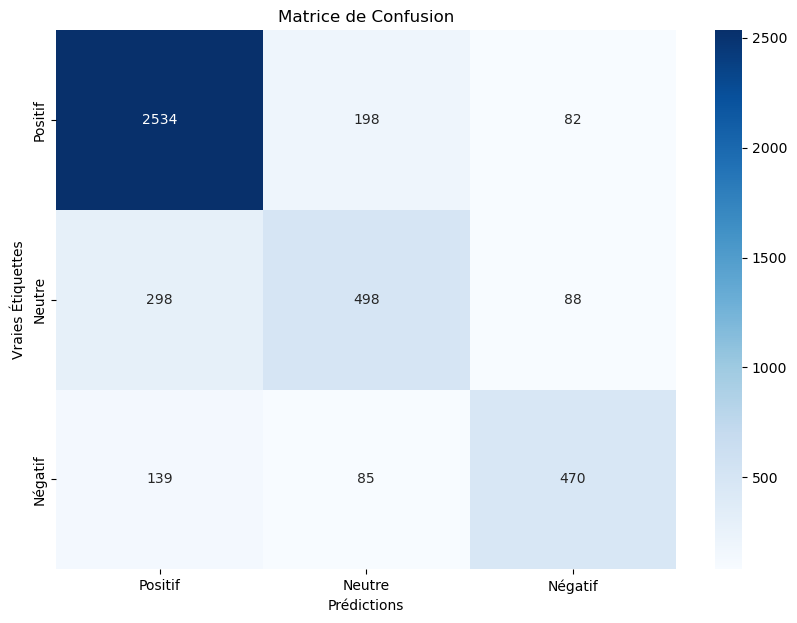

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtenir les prédictions du modèle sur les données de test
y_pred = model.predict(X_test)

# Convertir les prédictions et les vraies étiquettes en classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positif', 'Neutre', 'Négatif'], 
            yticklabels=['Positif', 'Neutre', 'Négatif'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies Étiquettes')
plt.title('Matrice de Confusion')
plt.show()

## LLM Berth : Dans le cas où la variable cible est inconnue 

On utilise un modèle de classification de texte basé sur BERT et fine-tuné pour l'analyse des sentiments

In [41]:
from transformers import pipeline

C:\Users\flori\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [43]:
data_2 = pd.read_csv("Tweets.csv", usecols=['text'])
data_2['text'] = data_2['text'].apply(nettoyer_texte)
data_2['text'] = data_2['text'].apply(tokeniser)
data_2['text'] = data_2['text'].apply(lemmatiser)
data_2 

,text
0,virginamerica dhepburn said
1,virginamerica plus youve added commercial expe...
2,virginamerica didnt today must mean need take ...
3,virginamerica really aggressive blast obnoxiou...
4,virginamerica really big bad thing
...,...
14635,americanair thank got different flight chicago
14636,americanair leaving 20 minute late flight warn...
14637,americanair please bring american airline blac...
14638,americanair money change flight dont answer ph...


In [45]:
# Charger un pipeline de classification de Hugging Face
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Fonction pour obtenir la note du commentaire
def get_score(comment):
    result = classifier(comment)
    # Extraire le label (par ex. "5 stars", "4 stars", etc.) et convertir en score de 1 à 5
    label = result[0]['label']
    score = int(label.split()[0])  # Supposant que le label est de la forme "5 stars", "4 stars", etc.
    return score

# Appliquer la fonction à chaque commentaire du DataFrame
data_2['score'] = data_2['text'].apply(get_score)

data_2

C:\Users\flori\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


,text,score
0,virginamerica dhepburn said,1
1,virginamerica plus youve added commercial expe...,5
2,virginamerica didnt today must mean need take ...,1
3,virginamerica really aggressive blast obnoxiou...,5
4,virginamerica really big bad thing,1
...,...,...
14635,americanair thank got different flight chicago,1
14636,americanair leaving 20 minute late flight warn...,1
14637,americanair please bring american airline blac...,1
14638,americanair money change flight dont answer ph...,1
